#Predicting Air Quality Index(AQI) with the help of PM2.5 and PM10

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
#Acessing google drive from google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [47]:
# Loading the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Dissertation/clean_data.csv')

In [48]:
#showing the first few data from the dataset
df.head(5)

,pubtime,PM2.5,PM10,NO2,O3,CO,SO2,AQI
0,2020-06-30 00:00:00,11.0,23.0,26.0,70.0,0.7,5.0,23.0
1,2020-06-30 01:00:00,14.0,23.0,29.0,54.0,0.8,5.0,23.0
2,2020-06-30 02:00:00,11.0,23.0,31.0,48.0,0.7,5.0,23.0
3,2020-06-30 03:00:00,12.0,25.0,42.0,26.0,0.7,5.0,25.0
4,2020-06-30 04:00:00,7.0,29.0,36.0,22.0,0.7,5.0,29.0


In [49]:
df.shape

(4417, 8)

#Linear Regression Model

In [50]:
#dropping all column except feature column PM2.5, and PM10 and store in x
x= df.drop(columns = ['pubtime','AQI','NO2','O3','CO','SO2'])
x

,PM2.5,PM10
0,11.0,23.0
1,14.0,23.0
2,11.0,23.0
3,12.0,25.0
4,7.0,29.0
...,...,...
4412,21.0,59.0
4413,22.0,65.0
4414,26.0,64.0
4415,24.0,58.0


In [51]:
#storing target column in y
y = df['AQI']
y

0       23.0
1       23.0
2       23.0
3       25.0
4       29.0
        ... 
4412    55.0
4413    58.0
4414    57.0
4415    54.0
4416    56.0
Name: AQI, Length: 4417, dtype: float64

In [52]:
#splitting test train data by using train_test_split libraries from sklearn
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=0)


In [53]:
#fitting the model
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
#calculating intercept c
c = lr.intercept_
c

15.780111766846716

In [55]:
# Calculating coefficient m
m = lr.coef_
m

array([0.43999371, 0.46367613])

In [56]:
#predicting y training values
y_pred_train = lr.predict(x_train)
y_pred_train

array([ 68.57188134, 134.40765759,  87.87052966, ...,  52.23477692,
        22.22421276,  63.95880245])

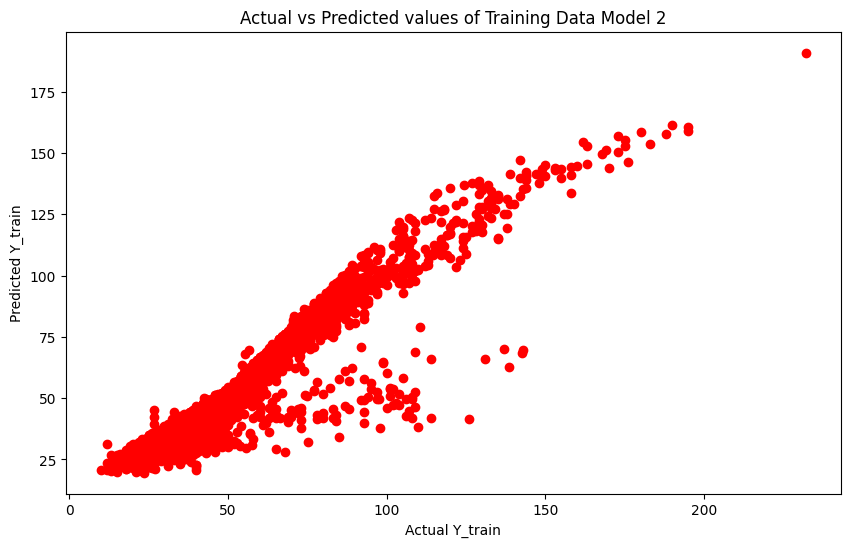

In [72]:
# Plotting Training Actual values vs Predicted Values
plt.figure(figsize=(10, 6))

# Scatter plot of training data (actual values)
plt.scatter(y_train, y_pred_train, color='red')

# Labels
plt.xlabel('Actual Y_train')
plt.ylabel('Predicted Y_train')
plt.title('Actual vs Predicted values of Training Data Model 2')


# Display the plot
plt.show()


In [58]:
#Prdicitng y testing values
y_pred_test = lr.predict(x_test)
y_pred_test

array([ 41.31969155,  30.93932957,  49.73690916,  54.06579902,
        81.50744816,  44.22016042,  24.49522857,  34.53032652,
        64.95720197,  54.62420483,  34.64873861,  45.44541189,
        25.79152729,  35.99240217,  66.15877101, 113.15957507,
       120.85260995,  32.81771651,  40.39233929,  43.03230156,
        59.3930884 , 127.38146837,  59.23728371,  79.93693266,
        46.81275786,  49.37481779,  68.32134698,  37.33606572,
        48.96536158,  37.68132976,  48.96536158, 119.75948076,
        48.03800932, 104.12287665,  76.43069314,  32.77035167,
        52.30582417,  30.96301198, 112.18485798,  44.47069479,
        43.66175462,  90.80465319,  50.03480836,  94.19621856,
        24.93522229,  34.57769136,  36.50344313,  42.85281445,
        47.02589963,  98.21349904,  42.6633551 ,  43.44861285,
        28.15727278, 102.37661198,  54.76629934,  51.21269498,
        54.26896855,  36.91975443,  51.33110707,  28.20463762,
        34.97032023,  57.75152565,  32.74666925,  32.35

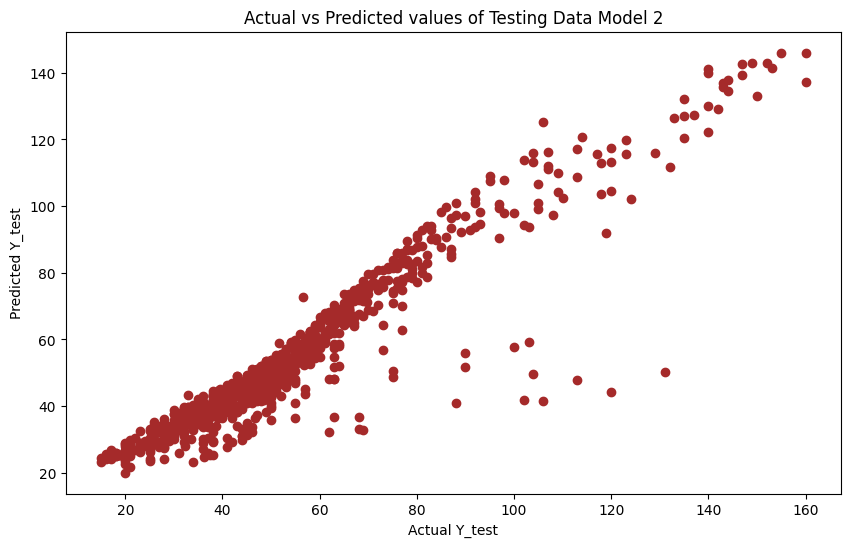

In [59]:
#Plotting  Testing Actual values vs Predicted Vlaues
plt.figure(figsize=(10, 6))
# Scatter plot of testing data
plt.scatter(y_test, y_pred_test, color ='brown')
# Labels
plt.xlabel('Actual Y_test')
plt.ylabel('Predicted Y_test')
plt.title('Actual vs Predicted values of Testing Data Model 2')
# Display the plot
plt.show()


In [60]:
#Calculating training data error term for linear regression
res_train = (y_train - y_pred_train)
res_train

4339    74.178119
4275    -1.407658
3849     5.129470
883     -1.614390
134      3.286828
          ...    
1033    -3.127031
3264     3.846780
1653    -0.234777
2607    -3.224213
2732    -5.958802
Name: AQI, Length: 3533, dtype: float64

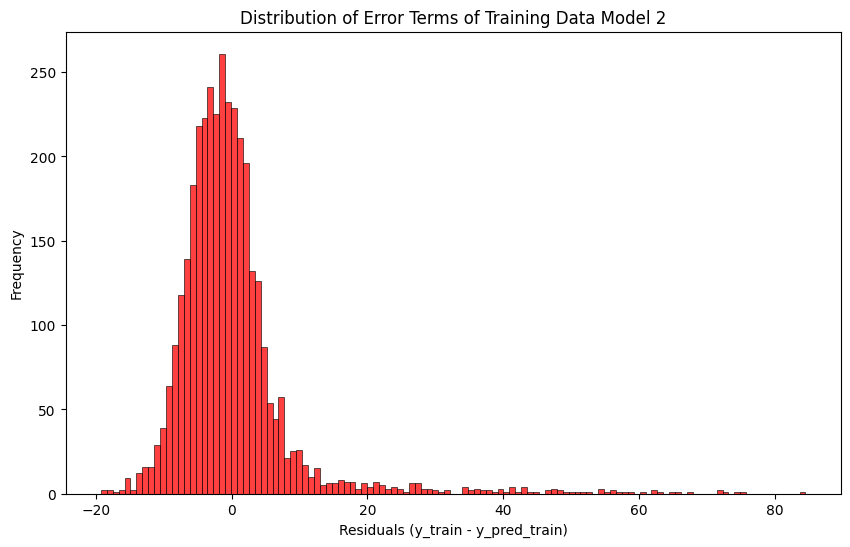

In [61]:
# Plotting histogram to show the error terms for trainig data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_train , color = 'red')

# Label the plot
plt.title('Distribution of Error Terms of Training Data Model 2')
plt.xlabel('Residuals (y_train - y_pred_train)')
plt.ylabel('Frequency')
plt.show()

In [62]:
#Calculating testing data error term for linear regression
res_test = (y_test - y_pred_test)
res_test

2917    -3.319692
1457    -1.939330
1669    54.263091
2013    -1.065799
4303    -6.507448
          ...    
2527    -6.575989
2339    -0.377723
3276     4.677802
3354    -1.046224
3019    -6.112312
Name: AQI, Length: 884, dtype: float64

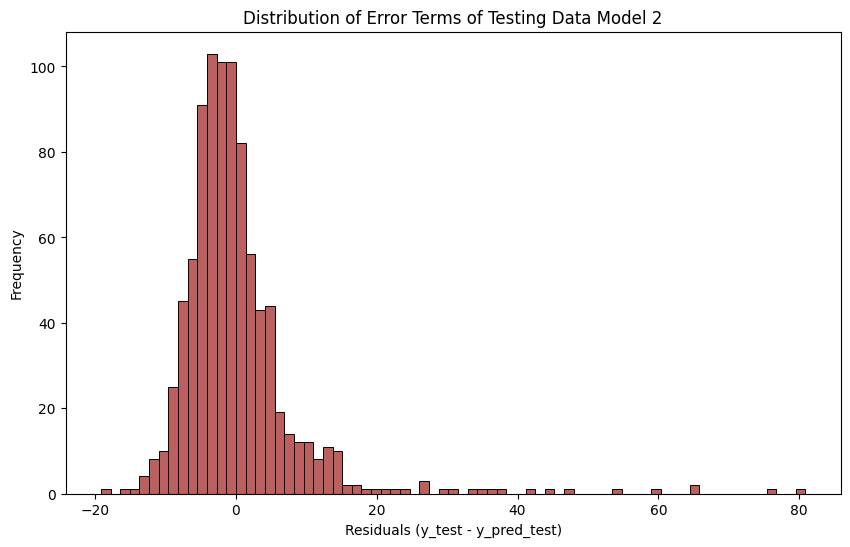

In [63]:
# Plotting histogram to show the error terms for testing data
plt.figure(figsize=(10, 6))
# Creating the histogram plot using Seaborn
sns.histplot(res_test , color ='brown')
# Label the plot
plt.title('Distribution of Error Terms of Testing Data Model 2')
plt.xlabel('Residuals (y_test - y_pred_test)')
plt.ylabel('Frequency')
plt.show()

Evaluation of Linear Regression

#Training Data

In [64]:
#Calculating Mean Squared Error of Training Data
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE) of Training Data:", mse)

Mean Squared Error (MSE) of Training Data: 83.78276854729341


In [65]:
#calculating Root Mean Squared Error of Training Data
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Training Data:", rmse)

Root Mean Squared Error (RMSE) of Training Data: 9.153292770762521


In [66]:
#Calculating Mean Absolute Error of Training Data
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE) of Training Data:", mae)

Mean Absolute Error (MAE) of Training Data: 5.30963259190655


In [67]:
#Calculating R-Squared of Training Data
rsquare =  r2_score(y_train, y_pred_train)
print("R-sqaured of Training Data:", rsquare)

R-sqaured of Training Data: 0.8752932834317113


###Testing Data

In [68]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) of Testing Data :", mse)

Mean Squared Error (MSE) of Testing Data : 79.53767552774848


In [69]:
#calculating Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) of Testing Data:", rmse)

Root Mean Squared Error (RMSE) of Testing Data: 8.918389738498115


In [70]:
#Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) of Testing Data:", mae)

Mean Absolute Error (MAE) of Testing Data: 5.210566166369225


In [71]:
#Calculating R-Squared  of Testing Data
rsquare =  r2_score(y_test, y_pred_test)
print("R-sqaured of Testing Data:", rsquare)

R-sqaured of Testing Data: 0.8794844616896935
